## 03 - Generate CCI data cubes 
### A DeepESDL example notebook 

This notebook demonstrates how to access CCI data via the dedicated xcube store, which provides dynamic data cube views into each gridded data set. More information on the data sets offered can be found in the [Open Data Portal](https://climate.esa.int/en/odp/#/dashboard) of the [ESA Climate Change Initiative](https://climate.esa.int/en/esa-climate/esa-cci/) (CCI).


Please, also refer to the [DeepESDL documentation](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2024

-----------------

**This notebook runs with the python environment `deepesdl-xcube-1.3.1`, please checkout the documentation for [help on changing the environment](https://deepesdl.readthedocs.io/en/latest/guide/jupyterlab/#python-environment-selection-of-the-jupyter-kerne).**

In [1]:
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
import shapely.geometry
from IPython.display import JSON
import matplotlib.pyplot as plt

Configure matplotlib to display graphs inline directly in the notebook and set a sensible default figure size.

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = 16,8

Check whether the `cciodp` store is among the available stores, if not please follow the installation information from the top of this notebook. 

In [3]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available for `cciodp`? 

In [4]:
get_data_store_params_schema('cciodp')

**Some of the CCI data is already available in a cloud-ready format, and new data is added on a regular basis. To access this data, select the `ccizarr` store instead of the `cciodp` store.**

Provide mandatory parameters to instantiate the store class:

In [5]:
store = new_data_store('cciodp')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

We may ask for a specific dataset ...

In [6]:
store.has_data('esacci.OC.5-days.L3S.CHLOR_A.multi-sensor.multi-platform.MERGED.3-1.geographic')

False

... but in many cases we want to query for certain criteria. How can we do that?

In [7]:
store.get_search_params_schema()

Now search, let's search for sea surface temperature data (SST) with a daily frequency: 

In [8]:
iterator = store.search_data(cci_attrs=dict(ecv='SST', frequency='day',processing_level='L4'))
JSON([item.to_dict() for item in iterator])

Could not open opendap url. No dds or das file provided.
Could not extract information about variables and attributes from https://data.cci.ceda.ac.uk/thredds/dodsC/esacci/sst/data/lt/Analysis/L4/v01.1/1991/09/03/19910903120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc
/home/conda/deepesdl/e977f1836b094ff82bba97816d63f7ffeb30e7187cbdb12e9452d6779da4d18c-20231215-155258-719209-329-xcube-1.1.2/lib/python3.11/site-packages/xcube_cci/cciodp.py:1276: CciOdpWarning: Variable "field_name" has no fill value, cannot set one. For parts where no data is available you will see random values. This is usually the case when data is missing for a time step.
  warnings.warn(f'Variable "{fixed_key}" has no fill value, '


<IPython.core.display.JSON object>

Which parameters must be passsed or are available to open the dataset? 

In [9]:
store.get_open_data_params_schema('esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.2-1.sst')

There are no required parameters, so we can decide what parameters we would like to provide them to open a dataset:

In [10]:
dataset = store.open_data('esacci.SST.day.L4.SSTdepth.multi-sensor.multi-platform.OSTIA.2-1.sst', 
                          variable_names=['analysed_sst'],
                          time_range=['1981-08-31','2016-12-31'])

dataset

<xarray.Dataset>
Dimensions:       (time: 12907, lat: 3600, lon: 7200, bnds: 2)
Coordinates:
  * lat           (lat) float32 -89.97 -89.93 -89.88 ... 89.88 89.93 89.97
    lat_bnds      (lat, bnds) float32 dask.array<chunksize=(3600, 2), meta=np.ndarray>
  * lon           (lon) float32 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
    lon_bnds      (lon, bnds) float32 dask.array<chunksize=(7200, 2), meta=np.ndarray>
  * time          (time) datetime64[ns] 1981-08-31T12:00:00 ... 2016-12-31T12...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(12907, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    analysed_sst  (time, lat, lon) float32 dask.array<chunksize=(1, 1200, 2400), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.SST.day.L4.SSTdepth.multi-sensor.multi-pl...
    date_created:            2024-02-28T09:39:12.794152
    processing_level:        L4
    time_coverage_start:     1981-08-31T00:00:00
    time_coverage_end:       2017-01-01T00:00:00
    time_coverage_duration:  P12907DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

Plot one time stamp of the dataset for a analysed_sst in order to take a brief look at the dataset:  

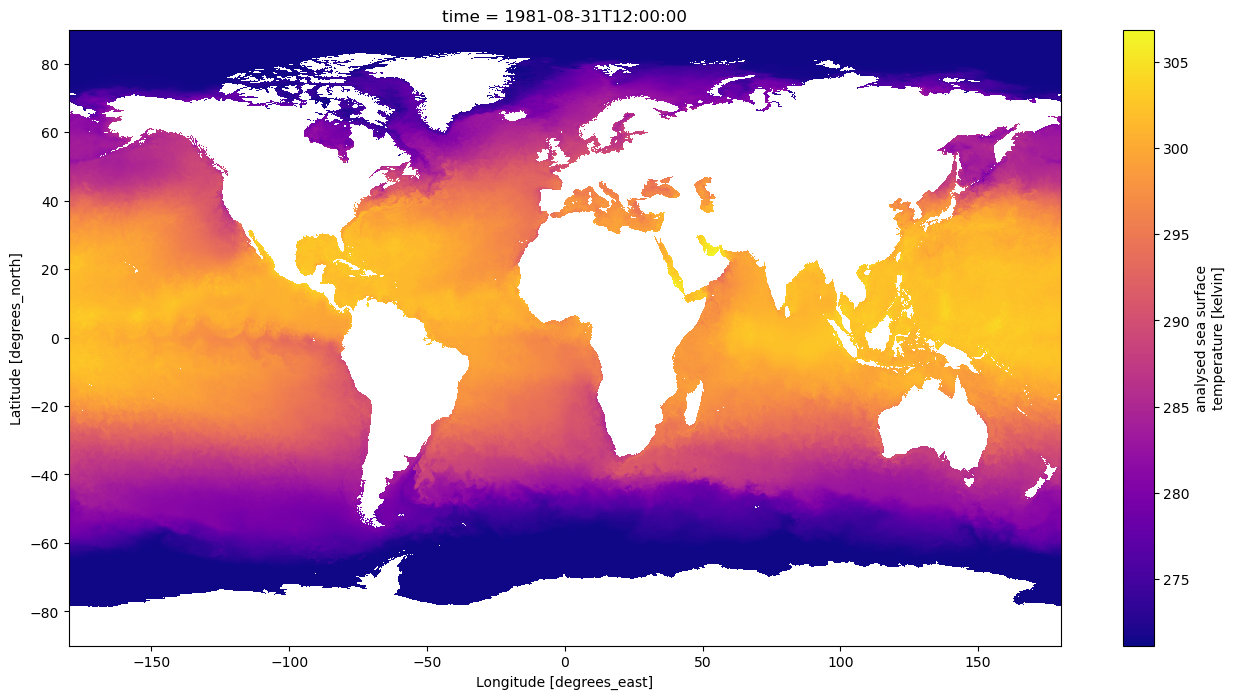

In [11]:
dataset.analysed_sst.isel(time=0).plot.imshow(cmap='plasma')